In [5]:
import os
import sys
import Wind_KAN_
import importlib
import time
import matplotlib.pyplot as plt

In [6]:
from Wind_KAN_ import *

In [7]:
model = Wind_KAN(width=[4,1], grid=3, k=3, seed=42)

checkpoint directory created: ./model
saving model version 0.0


In [8]:
winddata_path = os.path.join('..\\Liao_code','Task15_W_Zone6.csv')
model.get_winddataset(winddata_path)
dataset = model.dataset

In [5]:
model.save_act = True

In [6]:
dataset = model.dataset

In [5]:
results = model.fit_model()

| train_loss: 1.90e-01 | test_loss: 1.88e-01 | reg: 8.39e+00 | : 100%|█| 20/20 [00:08<00:00,  2.36it

saving model version 0.1


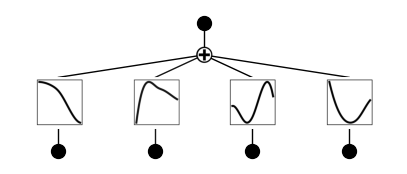

In [9]:
model.plot_model()

In [12]:
importlib.reload(Wind_KAN_)

# Loop through methods in the new class and update them on the existing instance
for method_name in dir(Wind_KAN_.Wind_KAN):
    if callable(getattr(Wind_KAN_.Wind_KAN, method_name)) and not method_name.startswith("__"):
        new_method = getattr(Wind_KAN_.Wind_KAN, method_name)
        setattr(model, method_name, new_method.__get__(model, model.__class__))

In [10]:
train_loss_old = results['train_loss'][0]
train_loss_new = results['train_loss'][-1]
fit_improvement = (train_loss_old - train_loss_new)/train_loss_old
fit_improvement

0.0016588557

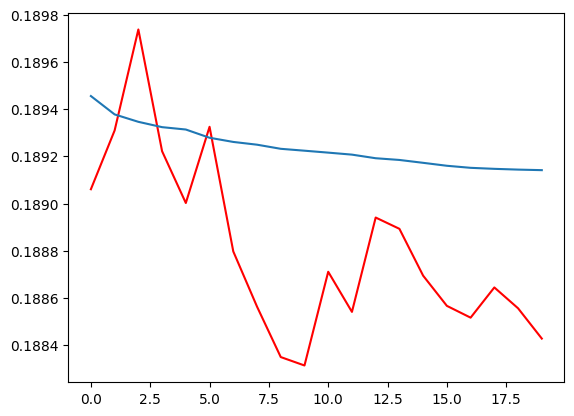

In [11]:
plt.plot(results['test_loss'], color='red')
plt.plot(results['train_loss'])

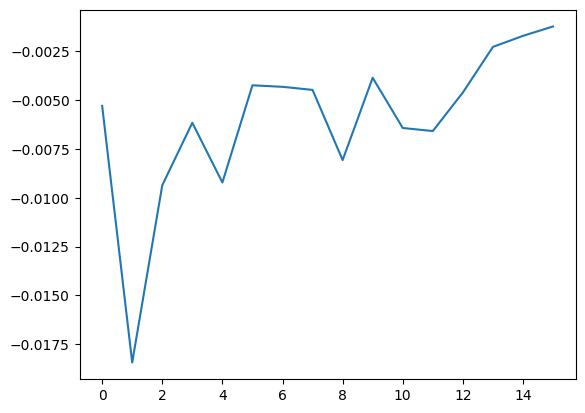

In [12]:
train_loss_percent = np.diff(results['train_loss'])
percentages = train_loss_percent/results['train_loss'][0]*100
plt.plot(percentages[3:])

In [9]:
from kan import *
torch.set_default_dtype(torch.float64)

In [10]:
model = KAN(width=[4,1], grid=3, k=3, seed=42)

checkpoint directory created: ./model
saving model version 0.0


In [11]:
from kan.utils import create_dataset
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
hello_dataset = create_dataset(f, n_var=2, device=device)
type(hello_dataset['train_input']), type(hello_dataset['train_label'])

(torch.Tensor, torch.Tensor)

In [12]:
type(dataset['train_input'])

torch.Tensor

In [13]:
model.fit(dataset, opt="LBFGS", steps=50, lamb=0.001)

description:   0%|                                                           | 0/50 [00:00<?, ?it/s]


RuntimeError: expected scalar type Double but found Float

In [13]:
model = model.prune()

Exception: missing input data x